In [11]:
import numpy as np
import pandas as pd

In [12]:
df = pd.read_csv('placement.csv')

In [13]:
df.head()

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  100 non-null    int64  
 1   cgpa        100 non-null    float64
 2   iq          100 non-null    float64
 3   placement   100 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 3.3 KB


In [15]:
df.shape

(100, 4)

In [16]:
df = df.iloc[:,1:]

In [17]:
df.head()

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0


In [18]:
# Steps

# 0. Preprocess + EDA + Feature Selection
# 1. Extract input and output cols
# 2. Scale the values
# 3. Train test split
# 4. Train the model
# 5. Evaluate the model/model selection
# 6. Deploy the model

In [19]:
import matplotlib.pyplot as plt


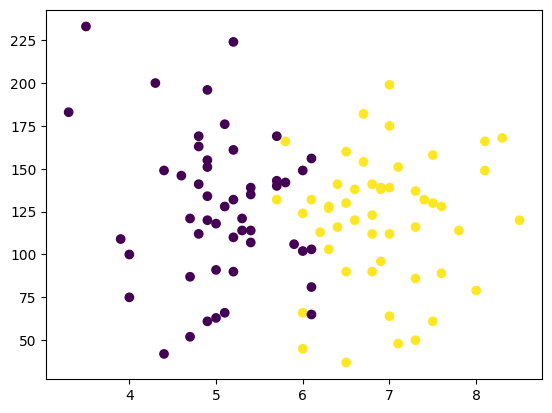

In [20]:
plt.scatter(df['cgpa'],df['iq'],c=df['placement'])

In [21]:
X = df.iloc[:,0:2]
y = df.iloc[:,-1]

In [22]:
X

,cgpa,iq
0,6.8,123.0
1,5.9,106.0
2,5.3,121.0
3,7.4,132.0
4,5.8,142.0
...,...,...
95,4.3,200.0
96,4.4,42.0
97,6.7,182.0
98,6.3,103.0


In [23]:
y.shape

(100,)

In [24]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.1)

In [25]:
X_train

,cgpa,iq
89,4.9,151.0
78,6.1,81.0
84,5.7,169.0
58,8.0,79.0
50,3.5,233.0
...,...,...
6,5.7,143.0
23,4.7,87.0
20,6.6,120.0
35,6.8,90.0


In [26]:
y_train

89    0
78    0
84    0
58    1
50    0
     ..
6     0
23    0
20    1
35    1
32    1
Name: placement, Length: 90, dtype: int64

In [27]:
X_test

,cgpa,iq
42,7.6,89.0
92,5.2,110.0
25,5.0,91.0
90,7.3,86.0
67,5.0,118.0
11,6.9,138.0
37,8.1,149.0
0,6.8,123.0
41,5.4,114.0
87,5.7,132.0


In [28]:
from sklearn.preprocessing import StandardScaler

In [29]:
scaler = StandardScaler()

In [30]:
X_train = scaler.fit_transform(X_train)

In [31]:
X_train

array([[-0.930259  ,  0.64196466],
       [ 0.12618655, -1.05592676],
       [-0.22596196,  1.07856532],
       [ 1.798892  , -1.10443795],
       [-2.1627788 ,  2.63092319],
       [-0.49007335,  0.35089756],
       [ 0.12618655,  0.18110842],
       [-0.22596196,  0.37515315],
       [-0.66614761,  0.88452058],
       [ 0.30226081, -0.52230374],
       [-0.66614761,  2.41262287],
       [ 0.47833507,  0.13259724],
       [ 1.1826321 , -1.80785011],
       [ 0.30226081,  0.05983046],
       [-0.13792484,  1.00579854],
       [-0.930259  ,  0.2296196 ],
       [-1.01829613,  0.93303177],
       [ 1.00655784, -1.85636129],
       [ 1.62281774, -0.25549223],
       [ 0.91852071, -1.46827182],
       [ 0.65440933,  1.39388801],
       [-1.45848177,  1.83048866],
       [-0.13792484,  0.42366434],
       [ 0.5663722 ,  0.32664197],
       [-0.930259  ,  1.7334663 ],
       [ 0.91852071,  1.22409887],
       [ 0.03814942, -1.41976064],
       [-0.930259  ,  0.73898703],
       [ 0.91852071,

In [32]:
X_test = scaler.transform(X_test)

In [33]:
X_test

array([[ 1.44674349, -0.86188203],
       [-0.66614761, -0.3525146 ],
       [-0.84222187, -0.81337085],
       [ 1.1826321 , -0.9346488 ],
       [-0.84222187, -0.15846987],
       [ 0.83048358,  0.32664197],
       [ 1.88692913,  0.59345348],
       [ 0.74244645, -0.03719191],
       [-0.49007335, -0.25549223],
       [-0.22596196,  0.18110842]])

In [34]:
from sklearn.linear_model import LogisticRegression

In [35]:
clf = LogisticRegression()

In [36]:
# model training
clf.fit(X_train,y_train)

LogisticRegression()

In [37]:
y_pred = clf.predict(X_test)

In [38]:
y_test

42    1
92    0
25    0
90    1
67    0
11    1
37    1
0     1
41    0
87    1
Name: placement, dtype: int64

In [39]:
from sklearn.metrics import accuracy_score

In [40]:
accuracy_score(y_test,y_pred)

0.9

In [41]:
from mlxtend.plotting import plot_decision_regions

<Axes: >

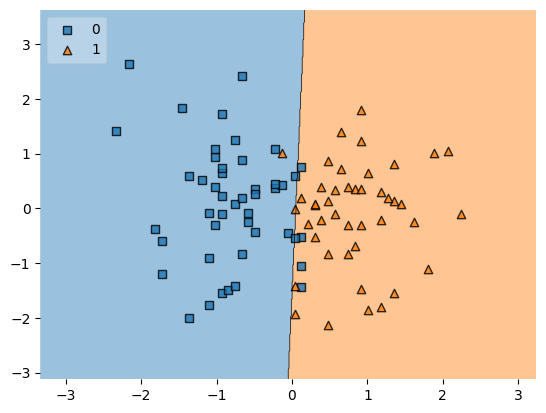

In [42]:
plot_decision_regions(X_train, y_train.values, clf=clf, legend=2)

In [43]:
import pickle
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification

# Assuming you have a dataset df with 'cgpa', 'iq', and 'placement' columns.
# Here's an example to generate a simple dataset (replace this with your actual dataset).
X = df[['cgpa', 'iq']]  # Features (cgpa, iq)
y = df['placement']  # Target (placement)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the model (e.g., Logistic Regression)
model = LogisticRegression()
model.fit(X_train, y_train)

# Save the trained model
pickle.dump(model, open('placement_model.pkl', 'wb'))
print("Model saved as placement_model.pkl")


Model saved as placement_model.pkl
